In [13]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/sample_data/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [14]:
! kaggle datasets download techsash/waste-classification-data


 99% 423M/427M [00:13<00:00, 38.1MB/s]
100% 427M/427M [00:13<00:00, 32.4MB/s]


In [15]:
 ! unzip /content/waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('/kaggle/input'):
        print(dirname)

In [17]:
train_path = "/content/DATASET/TRAIN"
test_path = "/content/DATASET/TEST"

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import  img_to_array, load_img
from keras.utils.vis_utils import plot_model
from glob import glob

In [19]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [00:10<00:00, 1232.73it/s]


In [20]:
print(data)

                                                   image label
0      [[[82, 129, 135], [111, 158, 164], [110, 157, ...     R
1      [[[253, 254, 248], [253, 254, 248], [253, 254,...     R
2      [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
3      [[[41, 45, 44], [41, 45, 44], [42, 46, 45], [4...     R
4      [[[255, 255, 255], [255, 255, 255], [255, 255,...     R
...                                                  ...   ...
22559  [[[130, 149, 31], [129, 149, 26], [128, 148, 2...     O
22560  [[[45, 32, 26], [46, 33, 27], [50, 33, 26], [5...     O
22561  [[[220, 249, 255], [220, 249, 255], [220, 249,...     O
22562  [[[252, 255, 251], [232, 237, 231], [238, 243,...     O
22563  [[[249, 248, 244], [249, 248, 244], [249, 248,...     O

[22564 rows x 2 columns]


In [21]:
data.shape

(22564, 2)

In [22]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

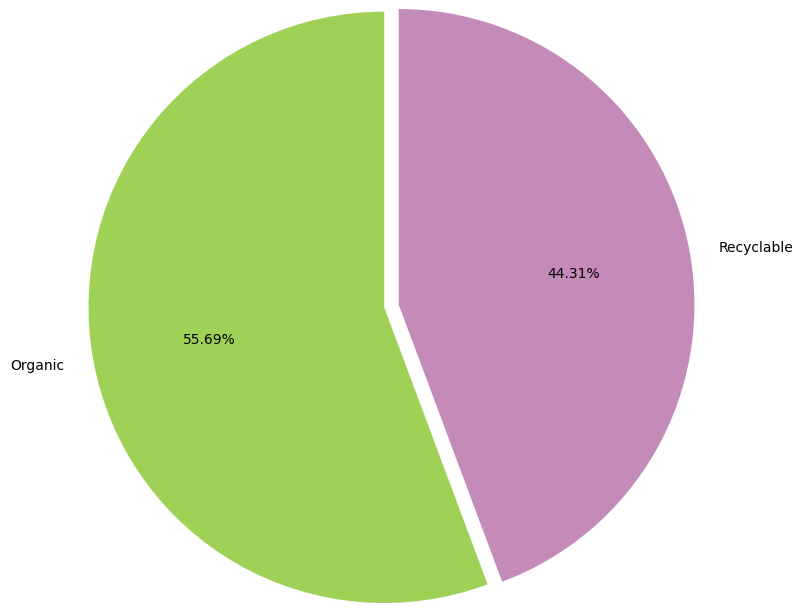

In [23]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

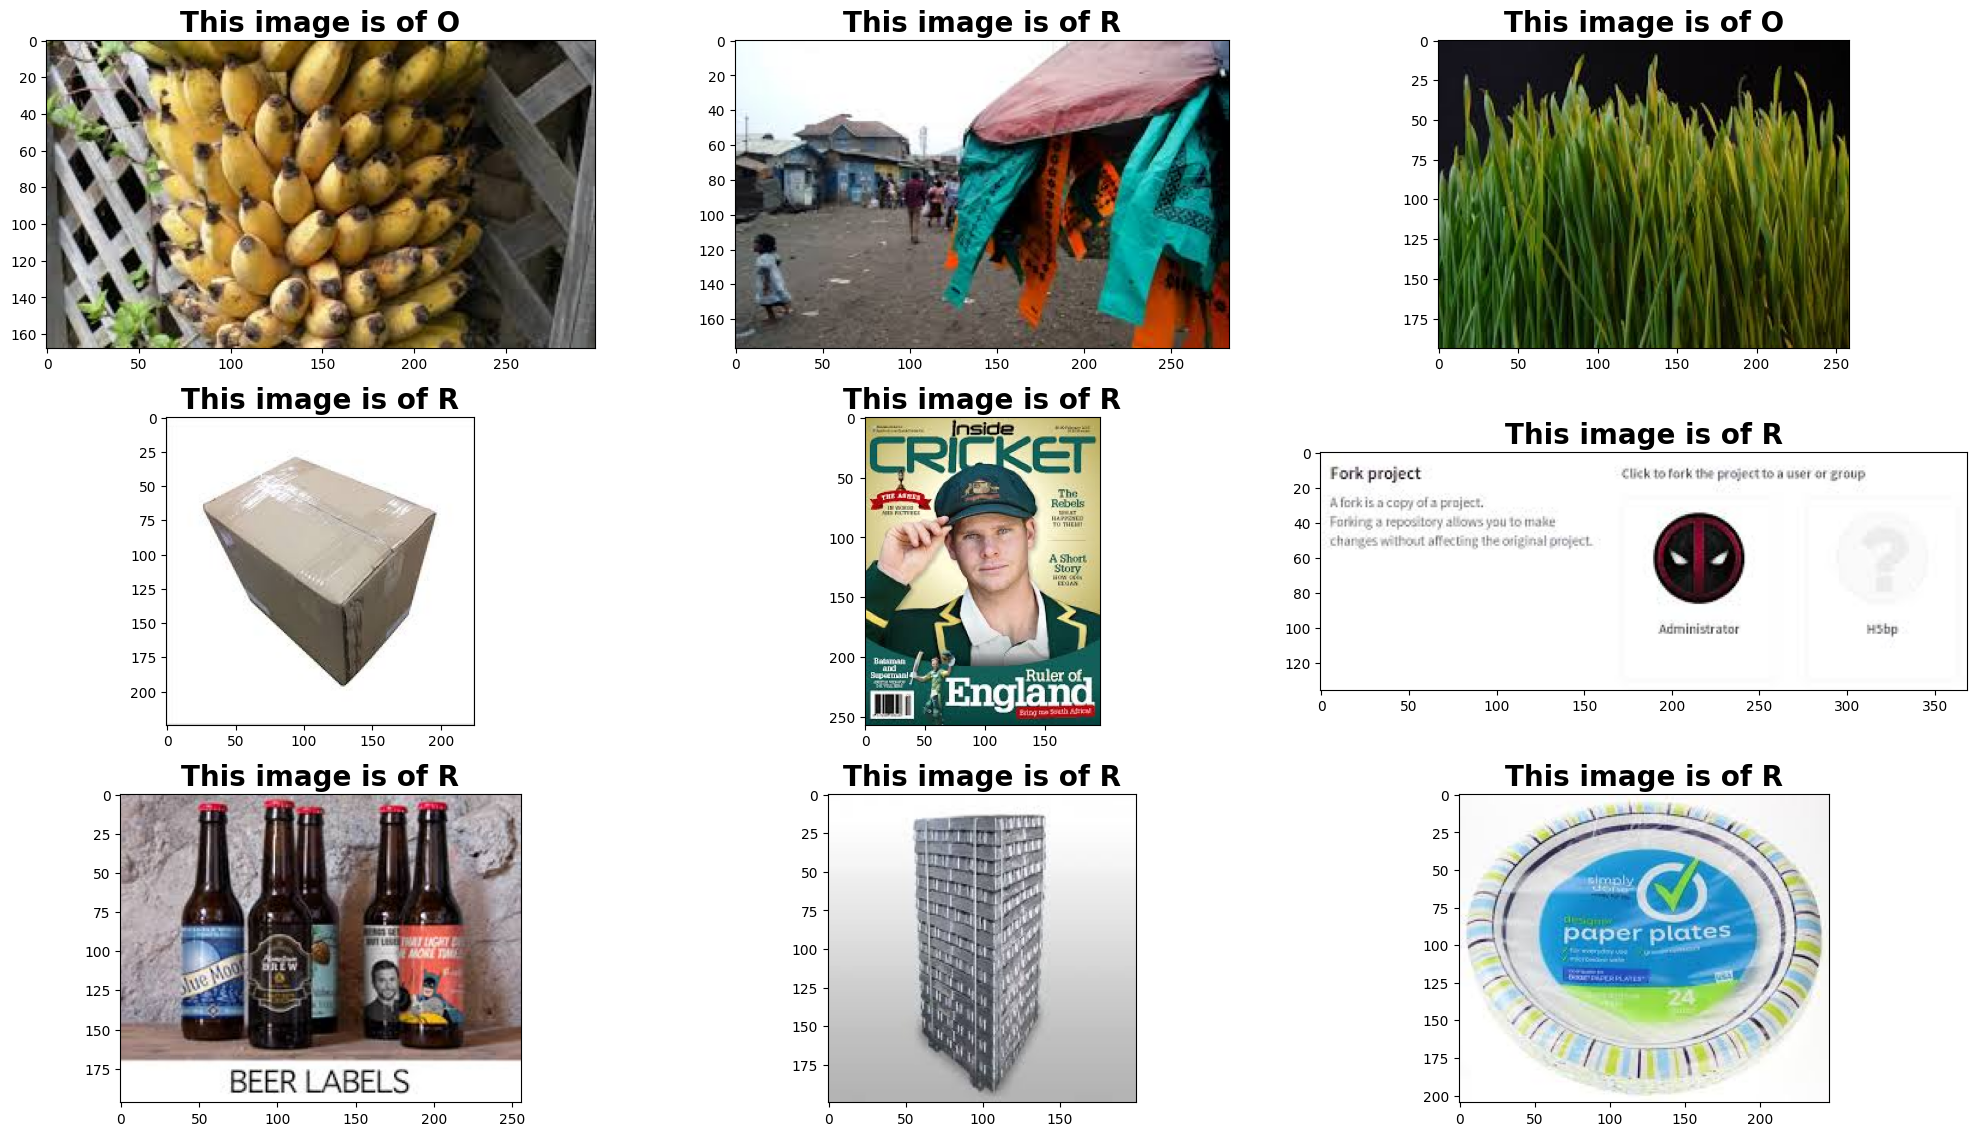

In [24]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [25]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


In [26]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

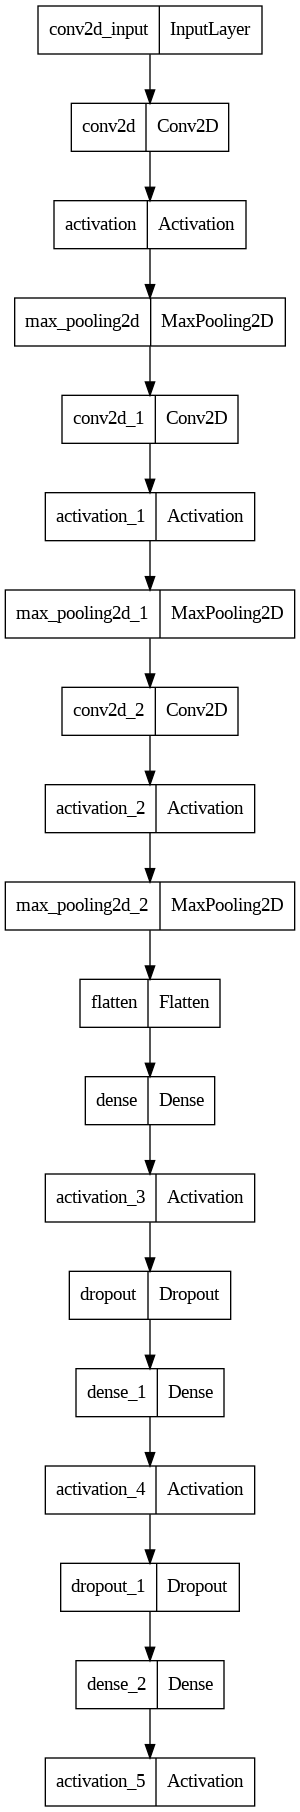

In [27]:

plot_model(model)

In [28]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [29]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [30]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop=EarlyStopping(monitor='val_loss',patience=7)

In [33]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator,callbacks=[early_stop])

Epoch 1/10
89/89 [==============================] - 101s 945ms/step - loss: 0.5124 - accuracy: 0.7855 - val_loss: 0.3651 - val_accuracy: 0.8615
Epoch 2/10
89/89 [==============================] - 71s 794ms/step - loss: 0.4101 - accuracy: 0.8288 - val_loss: 0.3168 - val_accuracy: 0.8790
Epoch 3/10
89/89 [==============================] - 75s 837ms/step - loss: 0.3750 - accuracy: 0.8484 - val_loss: 0.3044 - val_accuracy: 0.8739
Epoch 4/10
89/89 [==============================] - 71s 794ms/step - loss: 0.3588 - accuracy: 0.8573 - val_loss: 0.3180 - val_accuracy: 0.8611
Epoch 5/10
89/89 [==============================] - 71s 790ms/step - loss: 0.3194 - accuracy: 0.8743 - val_loss: 0.3078 - val_accuracy: 0.8770
Epoch 6/10
89/89 [==============================] - 71s 794ms/step - loss: 0.2986 - accuracy: 0.8843 - val_loss: 0.2718 - val_accuracy: 0.8942
Epoch 7/10
89/89 [==============================] - 70s 784ms/step - loss: 0.2738 - accuracy: 0.8929 - val_loss: 0.2845 - val_accuracy: 0.894

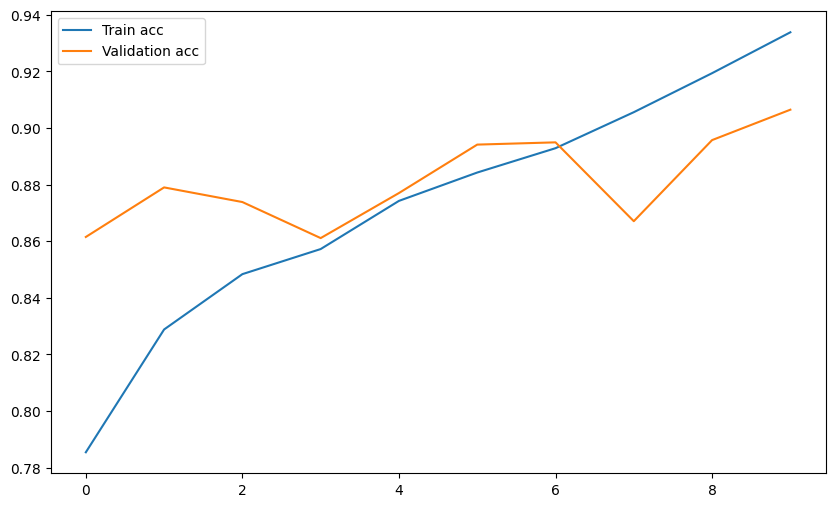

In [34]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

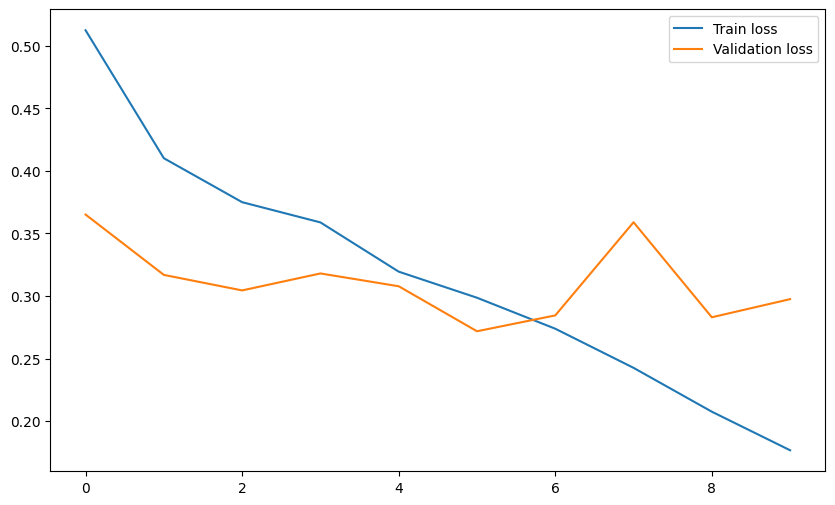

In [35]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [37]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 [==============================] - 0s 417ms/step
This image -> Organic


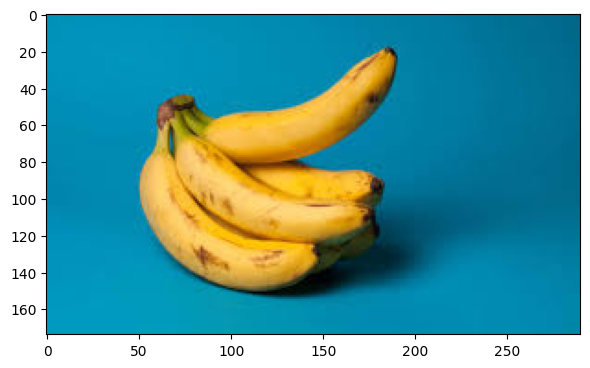

In [38]:
test_img = cv2.imread("/content/DATASET/TRAIN/O/O_10896.jpg")
predict_func(test_img)